<a href="https://colab.research.google.com/github/niteen11/lagcc_data_analytics_micro_credential/blob/master/Unit%203%20-%20Python%20Advanced/Assignments/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [5]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [6]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [7]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [8]:
# Mean of all salaries
np.mean(df.salary)

113706.45843828715

In [9]:
# Median of all salaries
np.median(df.salary)

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [10]:
df_sex_salary = df[['sex','salary']]
df_sex_salary

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


Finding the Median salary for all males

In [11]:
x_1 = np.median(df_sex_salary[df_sex_salary["sex"]=="Male"]['salary'])
x_1

108043.0

Finding the Median salary for all females

In [12]:
x_2 = np.median(df_sex_salary[df_sex_salary["sex"]=="Female"]['salary'])
x_2

103750.0

Comparing the Mean salary of Males and Females

In [13]:
# The difference between mean salaries of male and female
diff = x_1 - x_2
diff

4293.0

# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [14]:
df[df["yrs.service"]>=20]

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
6,7,Prof,B,30,23,Male,175000
7,8,Prof,B,45,45,Male,147765
8,9,Prof,B,21,20,Male,119250
...,...,...,...,...,...,...,...
384,385,Prof,A,27,21,Male,125192
386,387,Prof,A,29,27,Male,139219
388,389,Prof,A,38,36,Male,119450
392,393,Prof,A,33,30,Male,103106


In [15]:
x_3 = np.round(np.mean(df[df["yrs.service"]>=20]["salary"]),2)
x_3

122520.66

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [16]:
x_4 = np.round(np.mean(df[df["yrs.service"]<20]["salary"]),2)
x_4

107940.5

In [17]:
diff = x_3 - x_4
diff

14580.160000000003

People who have salary of greater than or equal to 200,000

In [18]:
df[df["salary"]>=200000]

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


Your Findings here...
Answer: People who have salary of greater than or equal to 200000 in this dataset are all male with Prof as rank. 

# Rename values, subset columns, etc

In [19]:
df.rename(columns={"Unnamed: 0":"employee_id"}, inplace=True)

In [20]:
df.head()

,employee_id,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [21]:
df["yrs.since.phd"] = pd.qcut(df['yrs.since.phd'], 4)
df.head()

,employee_id,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,"(12.0, 21.0]",18,Male,139750
1,2,Prof,B,"(12.0, 21.0]",16,Male,173200
2,3,AsstProf,B,"(0.999, 12.0]",3,Male,79750
3,4,Prof,B,"(32.0, 56.0]",39,Male,115000
4,5,Prof,B,"(32.0, 56.0]",41,Male,141500


# Create some simple visualizations showing some simple statistics

In [22]:
import seaborn as sns; sns.set()
plt.style.use('seaborn-notebook')

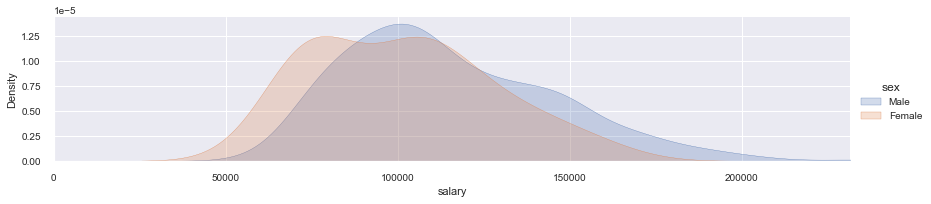

In [23]:
facet = sns.FacetGrid(df, hue="sex",aspect=4)
facet.map(sns.kdeplot,'salary',shade= True)
facet.set(xlim=(0, df['salary'].max()))
facet.add_legend() 
plt.show()

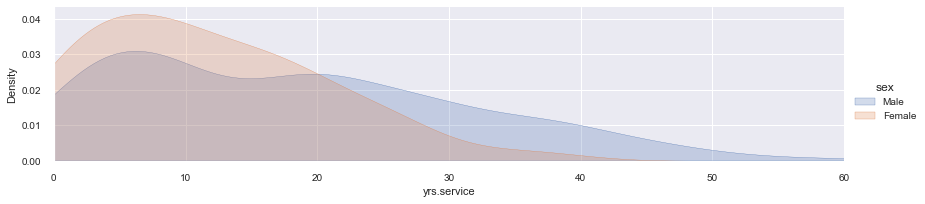

In [24]:
facet = sns.FacetGrid(df, hue="sex",aspect=4)
facet.map(sns.kdeplot,'yrs.service',shade= True)
facet.set(xlim=(0, df['yrs.service'].max()))
facet.add_legend() 
plt.show()

In [25]:
def bar_chart_by_sex(data, feature):
    male = data[data['sex']=="Male"][feature].value_counts()
    female = data[data['sex']=="Female"][feature].value_counts()
    data = pd.DataFrame([male,female])
    data.index = ['Male','Female']
    data.plot(kind='bar',stacked=True, figsize=(10,5))

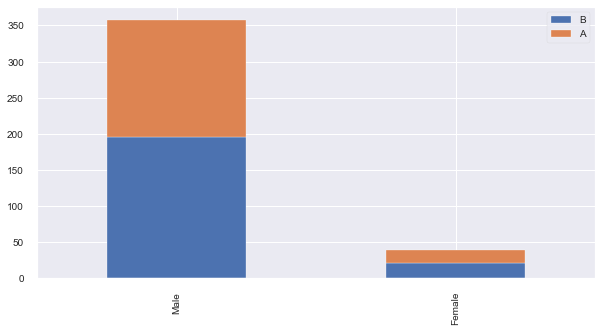

In [26]:
bar_chart_by_sex(df,"discipline")

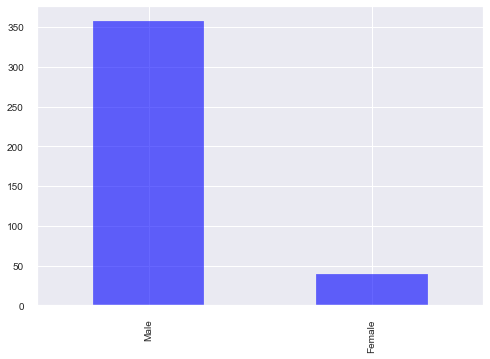

In [27]:
df.sex.value_counts().plot.bar(color = "blue", alpha = 0.6)
plt.show()

Your observations from the visuals: 1. male tend to have more years of services and have higher salaries than female in this dataset 2. we have much more male employees than female employees in this dataset

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

1. male tend to have more years of services and have higher salaries than female in this dataset 2. we have much more male employees than female employees in this dataset 3. Salaries tend to be higher when years of service get higher



